In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 150})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px

In [5]:
data = pd.read_csv('FINAL_ARXIV_2025_copy.csv')

In [6]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-01
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['powered by accretion of matter from a compan...,2025-01-01
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,NaN,[],2025-01-01
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,NaN,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,NaN,['galaxies: rotation curve - galaxies: fundame...,2025-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18267,DESI Strong Lens Foundry V: A Sample of HST-Ob...,We present six galaxy-scale strong lenses with...,"['Xiaosheng Huang', 'David Alvarez-Garcia', 'M...",26.0,40.0,19.0,arxiv.org/pdf/2512.07823,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,SF2A-2025: Proceedings of the Annual meeting o...,['galaxies: high-redshift – gravitational lens...,2025-12-01
18268,"Hot, Photoionized X-ray Gas in Two Luminous Ty...",We present new Chandra/ACIS-S imaging spectros...,"['Anna Trindade Falcão', 'S. Kraemer', 'L. Feu...",8.0,19.0,6.0,arxiv.org/pdf/2512.07793,Astrophysics of Galaxies,NaN,NaN,NaN,['High-luminosity active galactic nuclei'],2025-12-01
18269,Microquasar remnants as hidden PeVatrons,The Large High Altitude Air Shower Observatory...,"['Leandro Abaroa', 'Gustavo E. Romero', 'Valen...",3.0,4.0,0.0,arxiv.org/pdf/2512.07781,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['Cosmic rays – relativistic processes – X-ray...,2025-12-01
18270,X-ray Analysis of Gamma-Ray Burst Flares and U...,Gamma-ray burst (GRB) X-ray light curves exhib...,"['H. Dereli-Bégué', ""A. Pe'er"", 'D. Bégué', 'F...",10.0,28.0,4.0,arxiv.org/pdf/2512.07731,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,"['Light Curves: X-ray', 'Gamma-ray bursts', 'R...",2025-12-01


In [7]:
print(data['submitted_journal'].unique())

['AAS Journals' nan
 'IEEE Transactions on Applied Superconductivity for ASC2024 special issue'
 'appear in the Proceedings of the 17th Marcel Grossmann Meeting (MG17)/Pescara'
 'ApJ' 'A&A' 'Monthly Notices of the Royal Astronomical Society (MNRAS)'
 'Astronomy & Astrophysics' 'PASP' 'MNRAS'
 'Astronomy & Astrophysics (A&A)' 'ApJL' 'AJ Jan 23 2025'
 'the Open Journal of Astrophysics'
 'Astronomy & Astrophysics on 20 January' 'MNRAS (23 January 2025)'
 'ApJ January 22' 'the Journal of High Energy Astrophysics' 'PRD' 'JHEAP'
 'the Astrophysical Bulletin journal' 'AJ' 'Astronomy and Astrophysics'
 'the Astrophysical Journal' 'Astronomy and Astrophysics Letters'
 'Astronomy & Astrophysics (16 pages' 'Astronomy & Astrophysics (18 pages'
 'JOSS' 'PASA' 'MRNAS' 'EPJ Web Conf' 'ApJS' 'The Astrophysical Journal'
 'Astronomical Data Analysis Software and Systems (ADASS) XXXIV 2024'
 'Research Notes of the AAS' 'Astronomy and Astrophysics (A&A)'
 'MNRAS in this form'
 'ApJ- this is the revised ve

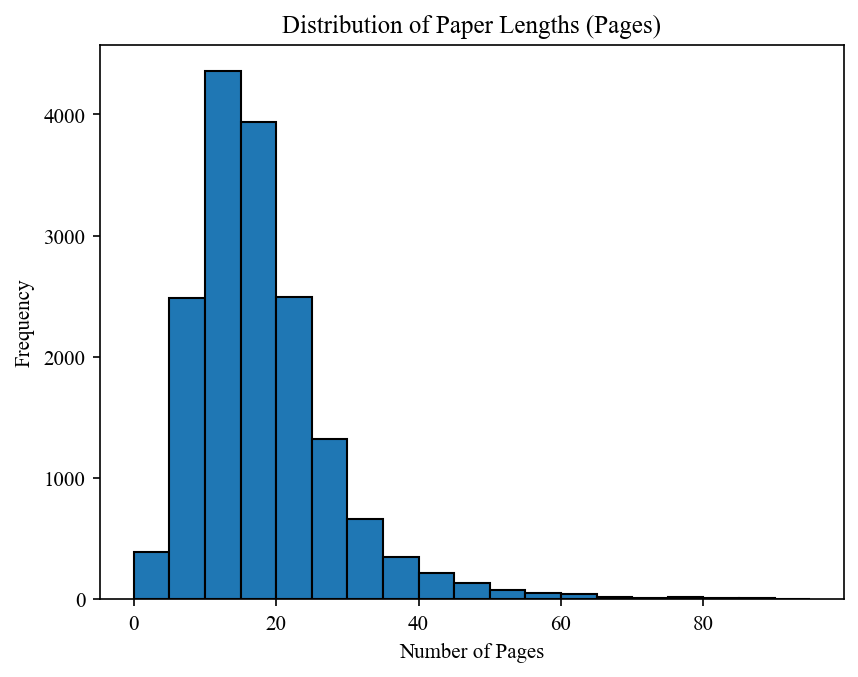

In [4]:
bins = np.arange(0, 100, 5)
plt.hist(data['pages'], bins=bins, edgecolor='black')
plt.title('Distribution of Paper Lengths (Pages)')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

In [5]:
data['tables'] = data['tables'].fillna(0)
data['pages'] = data['pages'].fillna(0)

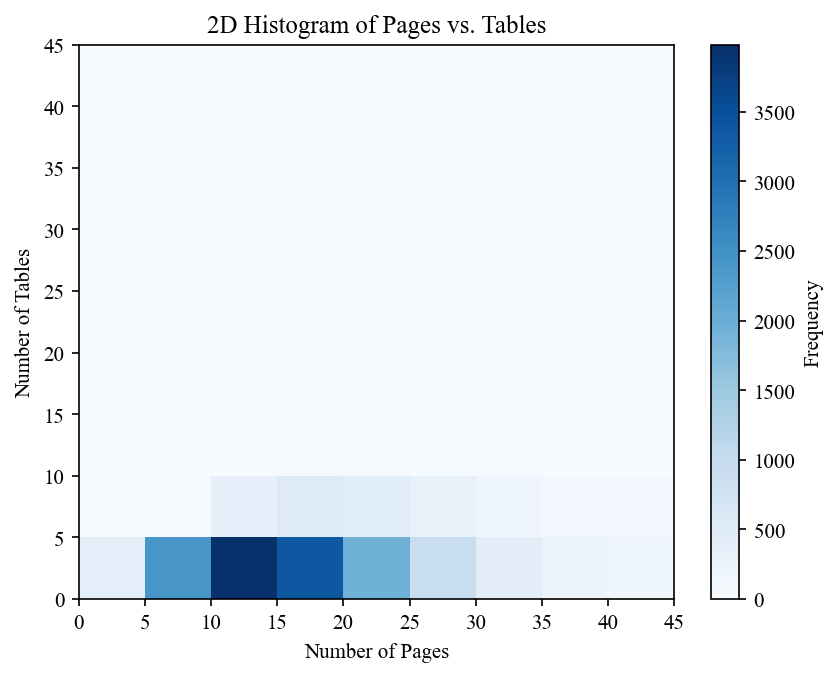

In [6]:
bins = np.arange(0, 50, 5)
plt.hist2d(data['pages'], data['tables'], bins=[bins, bins], cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('2D Histogram of Pages vs. Tables')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Tables')
plt.show()

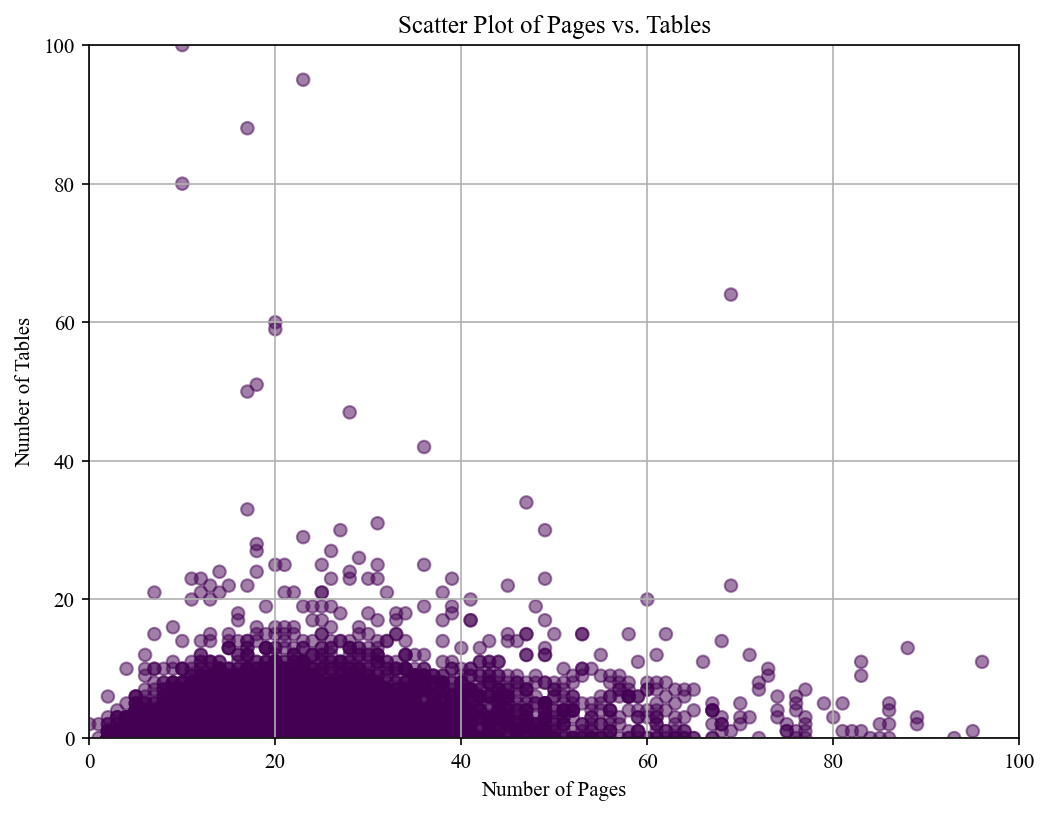

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(data['pages'], data['tables'], c=data['figures'], alpha=0.5, cmap='viridis')
plt.title('Scatter Plot of Pages vs. Tables')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Tables')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()